In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score, accuracy_score

In [6]:
df = pd.read_csv('Fraud.csv')

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1105702,130,CASH_IN,7682.33,C1806698645,2334255.13,2341937.46,C592660935,160169.05,152486.72,0.0,0.0
1105703,130,CASH_IN,187819.71,C625840149,2341937.46,2529757.17,C13049880,564242.91,376423.19,0.0,0.0
1105704,130,CASH_IN,384744.29,C133546213,2529757.17,2914501.46,C935808590,32709339.22,32333645.64,0.0,0.0
1105705,130,CASH_IN,78456.40,C832863029,2914501.46,2992957.86,C561167332,1227284.46,1148828.06,0.0,0.0
1105706,130,CASH_IN,44298.86,C1513830708,2992957.86,3.00,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105707 entries, 0 to 1105706
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1105707 non-null  int64  
 1   type            1105707 non-null  object 
 2   amount          1105707 non-null  float64
 3   nameOrig        1105707 non-null  object 
 4   oldbalanceOrg   1105707 non-null  float64
 5   newbalanceOrig  1105707 non-null  float64
 6   nameDest        1105706 non-null  object 
 7   oldbalanceDest  1105706 non-null  float64
 8   newbalanceDest  1105706 non-null  float64
 9   isFraud         1105706 non-null  float64
 10  isFlaggedFraud  1105706 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 92.8+ MB


In [11]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [15]:
df.shape

(1105707, 11)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
type(df)
frauds = list(df['isFraud'])


In [23]:

# print(frauds)
count_0 = 0
count_1 = 0
for i in frauds:
    if(i==0):
       count_0 += 1
    else:
        count_1 += 1
print(count_0)
print(count_1)
print('Percentage frauds:',count_1/count_0 )


1104218
1489
Percentage frauds: 0.0013484656109572567


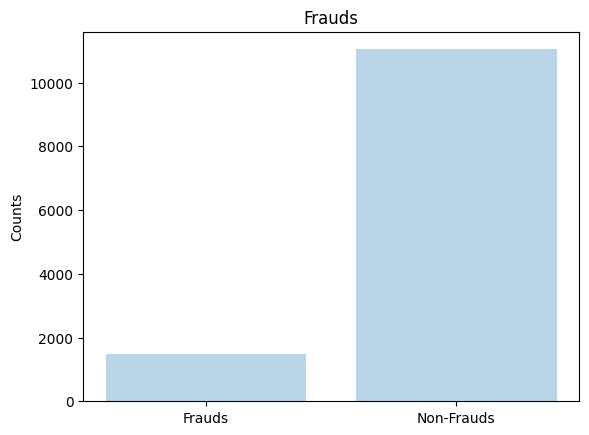

In [24]:

objects = ('Frauds', 'Non-Frauds')
y_pos = np.arange(len(objects))
performance = [count_1,count_0/100]
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Frauds')
plt.show()

In [27]:
# the below data nad plot shows the distribution of the fraud transactions in the type of data

# types of fraud transactions
fraud_trans = list(df.loc[df.isFraud==1].type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_trans)

# plot for the same
# fraud_count = trans_data.groupby(['isFraud','type']).size().plot(kind='bar')

# removing the data which do not have fraudalant transactions
trans_data_new = df.loc[(df['type'].isin(['TRANSFER','CASH_OUT'])),:]
trans_data_new

Types of transactions that have Frauds:  ['TRANSFER', 'CASH_OUT']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1105654,130,TRANSFER,593675.88,C2121948633,81494.58,0.0,C509250177,678900.35,1272576.23,0.0,0.0
1105656,130,CASH_OUT,202829.95,C1140002498,914.00,0.0,C1845318604,0.00,291331.51,0.0,0.0
1105684,130,CASH_OUT,200920.68,C1579439987,31199.00,0.0,C1301433408,0.00,200920.68,0.0,0.0
1105686,130,CASH_OUT,604135.93,C1731148592,54.00,0.0,C2084540626,191965.87,796101.80,0.0,0.0


<Axes: >

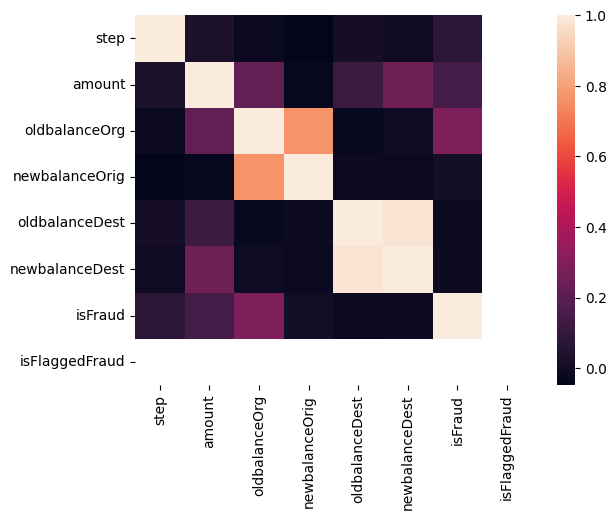

In [29]:

# Assuming 'trans_data_new' is your DataFrame

# Select only numerical features for correlation calculation
numerical_features = trans_data_new.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Generate the heatmap
sns.heatmap(corr_matrix)

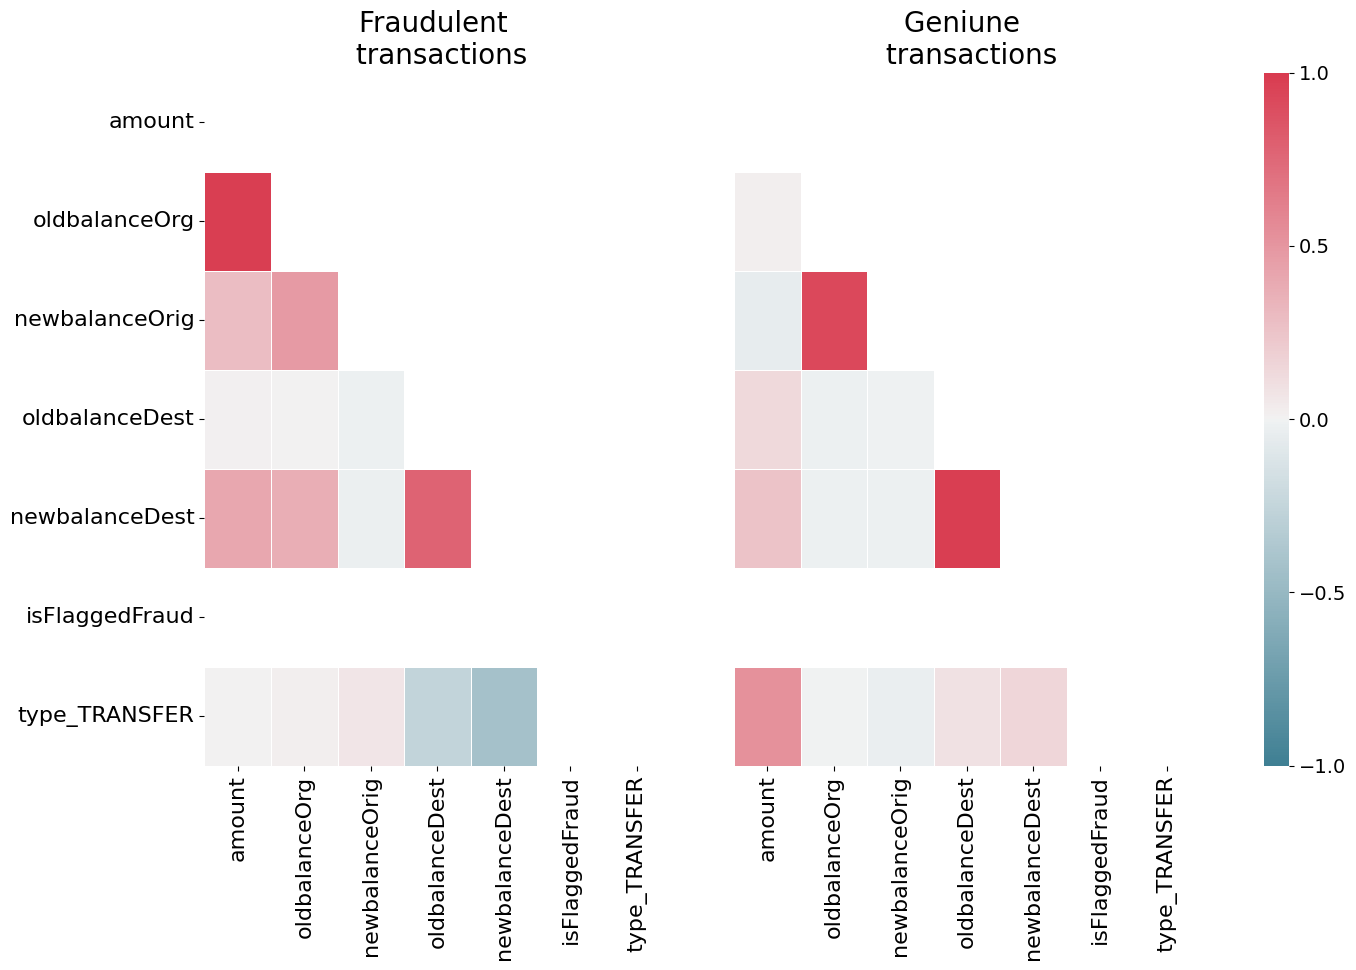

In [30]:
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

import seaborn as sns
Xfraud = X.loc[y['isFraud']==1] # update Xfraud & XnonFraud with cleaned data
Xnonfraud = X.loc[y['isFraud']==0]

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationFraud)
indices = np.triu_indices_from(correlationFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16);
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16);
ax1.set_title('Fraudulent \n transactions', size = 20)

correlationnonFraud = Xnonfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationnonFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16);
ax2.set_title('Geniune \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [31]:
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
C_threshold=[0.001, 0.01, 0.1, 1]
max=0
best_parameter=0
for alpha in C_threshold:
  # Change the solver to 'liblinear' or 'saga' to support 'l1' penalty
  lr = LogisticRegression(C = alpha, penalty = 'l1', solver='liblinear')
  y_pred_undersample_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

  fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
  roc_auc = auc(fpr,tpr)
  if roc_auc>max:
    max=roc_auc
    best_parameter=alpha
print("Best hyperparamter/c-value {}".format(best_parameter))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Best hyperparamter/c-value 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


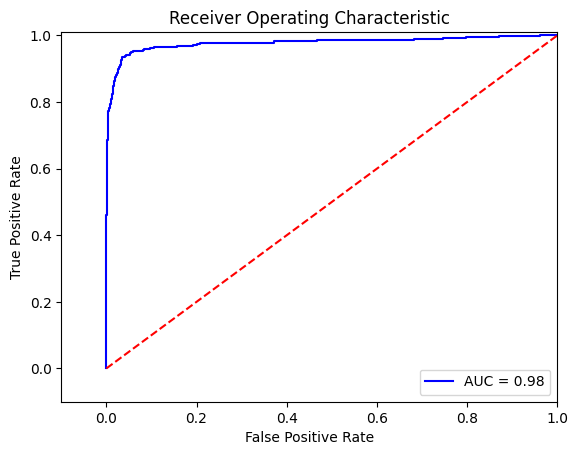

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
# Change the solver to 'liblinear' to support 'l1' penalty
lr = LogisticRegression(C = 1, penalty = 'l1', solver='liblinear')
y_pred_undersample_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
#this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#without applying SMOTE
from sklearn.linear_model import LogisticRegression
# Import necessary modules
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score # Import f1_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac = accuracy_score(y_test, y_pred)*100
lr_rs = recall_score(y_test, y_pred)*100
lr_ps = precision_score(y_test, y_pred)*100
lr_fs = f1_score(y_test, y_pred)*100

print('Logistic Regression without applying SMOTE-')
print('Accuracy:',lr_ac,'%')
print('Recall:',lr_rs,'%')
print('Precision:',lr_ps,'%')
print('F1 score:',lr_fs,'%')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression without applying SMOTE-
Accuracy: 99.80001132011395 %
Recall: 41.08216432865731 %
Precision: 89.51965065502183 %
F1 score: 56.31868131868132 %


In [52]:
from sklearn.neighbors import KNeighborsClassifier
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

#without applying SMOTE

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

knn_ac = accuracy_score(y_test, y_pred)*100
knn_rs = recall_score(y_test, y_pred)*100
knn_ps = precision_score(y_test, y_pred)*100
knn_fs = f1_score(y_test, y_pred)*100

print('KNN Method without applying SMOTE-')
print('Accuracy:',knn_ac,'%')
print('Recall:',knn_rs,'%')
print('Precision:',knn_ps,'%')
print('F1 score:',knn_fs,'%')

#with SMOTE
smt = SMOTE()
# Use fit_resample instead of fit_sample
X_train, y_train = smt.fit_resample(X_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

knn_ac_sm = accuracy_score(y_test, y_pred)*100
knn_rs_sm = recall_score(y_test, y_pred)*100
knn_ps_sm = precision_score(y_test, y_pred)*100
knn_fs_sm = f1_score(y_test, y_pred)*100

print('KNN Method with SMOTE-')
print('Accuracy:',knn_ac_sm,'%')
print('Recall:',knn_rs_sm,'%')
print('Precision:',knn_ps_sm,'%')
print('F1 score:',knn_fs_sm,'%')


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Method without applying SMOTE-
Accuracy: 99.86793200384884 %
Recall: 65.33066132264528 %
Precision: 89.80716253443526 %
F1 score: 75.63805104408353 %


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Method with SMOTE-
Accuracy: 98.70133137118025 %
Recall: 83.36673346693387 %
Precision: 17.347789824854047 %
F1 score: 28.71936486020021 %


In [42]:
#with SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
# Replace 'fit_sample' with 'fit_resample'
X_train, y_train = smt.fit_resample(X_train, y_train)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac_sm = accuracy_score(y_test, y_pred)*100
lr_rs_sm = recall_score(y_test, y_pred)*100
lr_ps_sm = precision_score(y_test, y_pred)*100
lr_fs_sm = f1_score(y_test, y_pred)*100

print('Logistic Regression with SMOTE-')
print('Accuracy:',lr_ac_sm,'%')
print('Recall:',lr_rs_sm,'%')
print('Precision:',lr_ps_sm,'%')
print('F1 score:',lr_fs_sm,'%')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with SMOTE-
Accuracy: 91.3193592815501 %
Recall: 96.59318637274549 %
Precision: 3.3781889543033365 %
F1 score: 6.528069343807137 %


In [43]:
# Random Forest method
# this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

#getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#without applying SMOTE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac = accuracy_score(y_test, y_pred)*100
rf_rs = recall_score(y_test, y_pred)*100
rf_ps = precision_score(y_test, y_pred)*100
rf_fs = f1_score(y_test, y_pred)*100

print('Random Forest Method without applying SMOTE-')
print('Accuracy:',rf_ac,'%')
print('Recall:',rf_rs,'%')
print('Precision:',rf_ps,'%')
print('F1 score:',rf_fs,'%')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Method without applying SMOTE-
Accuracy: 99.90000566005698 %
Recall: 71.9438877755511 %
Precision: 94.97354497354497 %
F1 score: 81.87001140250855 %


In [45]:
#with smote
from imblearn.over_sampling import SMOTE
smt = SMOTE()
# Replace 'fit_sample' with 'fit_resample'
X_train, y_train = smt.fit_resample(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac_sm = accuracy_score(y_test, y_pred)*100
rf_rs_sm = recall_score(y_test, y_pred)*100
rf_ps_sm = precision_score(y_test, y_pred)*100
rf_fs_sm = f1_score(y_test, y_pred)*100

print('Random Forest Method with SMOTE-')
print('Accuracy:',rf_ac_sm,'%')
print('Recall:',rf_rs_sm,'%')
print('Precision:',rf_ps_sm,'%')
print('F1 score:',rf_fs_sm,'%')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Method with SMOTE-
Accuracy: 99.63272519165581 %
Recall: 86.97394789579158 %
Precision: 45.54039874081847 %
F1 score: 59.77961432506888 %


In [48]:
#this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#without applying SMOTE
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,learning_rate=0.05,max_depth=4)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)*100
xgb_rs = recall_score(y_test, y_pred)*100
xgb_ps = precision_score(y_test, y_pred)*100
xgb_fs = f1_score(y_test, y_pred)*100

print('XGBoost without applying SMOTE-')
print('Accuracy:',xgb_ac,'%')
print('Recall:',xgb_rs,'%')
print('Precision:',xgb_ps,'%')
print('F1 score:',xgb_fs,'%')



XGBoost without applying SMOTE-
Accuracy: 99.88742775566163 %
Recall: 66.33266533066133 %
Precision: 96.78362573099415 %
F1 score: 78.71581450653984 %


In [47]:
#with SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
# Replace 'fit_sample' with 'fit_resample'
X_train, y_train = smt.fit_resample(X_train, y_train)
xgb = XGBClassifier(n_estimators=100,learning_rate=0.09,max_depth=4)
xgb.fit(X_train, y_train)
# Assuming X_test is a pandas DataFrame, convert it to a NumPy array if necessary
# Check the documentation for XGBClassifier to see if it accepts DataFrames directly
# If it does, you can remove the next line
X_test_np = X_test.to_numpy()  # Convert to NumPy array
y_pred = xgb.predict(X_test_np)

xgb_ac_sm = accuracy_score(y_test, y_pred)*100
xgb_rs_sm = recall_score(y_test, y_pred)*100
xgb_ps_sm = precision_score(y_test, y_pred)*100
xgb_fs_sm = f1_score(y_test, y_pred)*100

print('XGBoost with SMOTE-')
print('Accuracy:',xgb_ac_sm,'%')
print('Recall:',xgb_rs_sm,'%')
print('Precision:',xgb_ps_sm,'%')
print('F1 score:',xgb_fs_sm,'%')

XGBoost with SMOTE-
Accuracy: 97.48504801615003 %
Recall: 97.39478957915831 %
Precision: 10.867620751341683 %
F1 score: 19.55340977670489 %


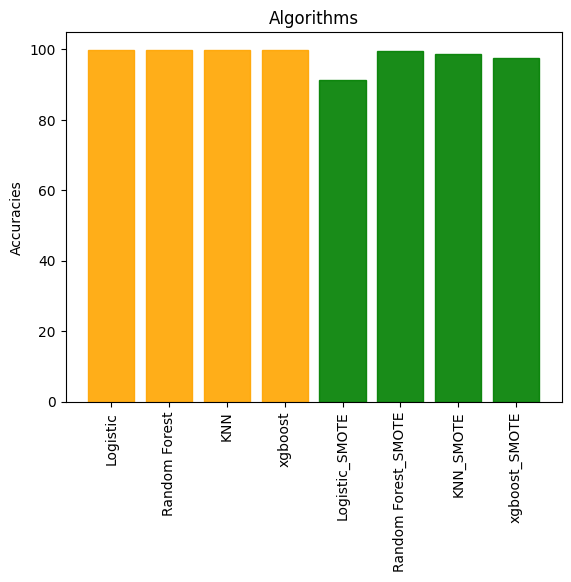

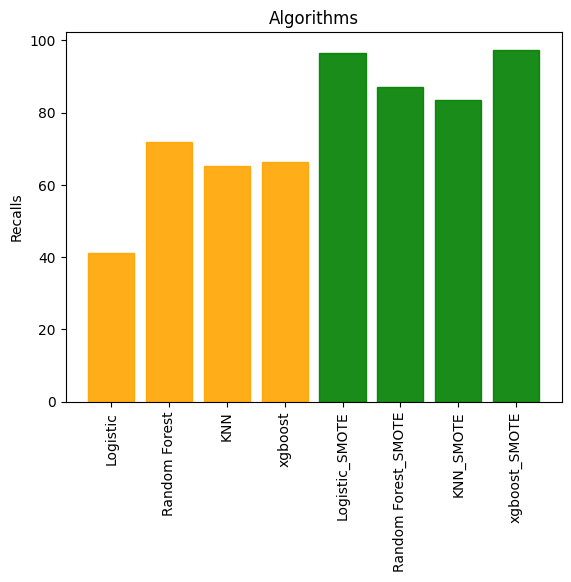

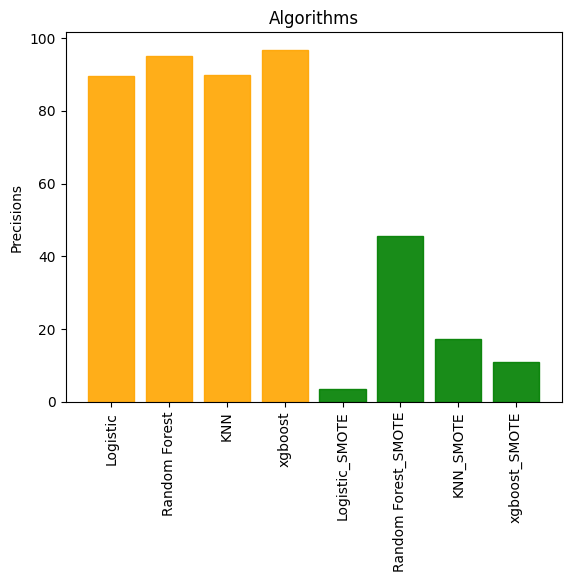

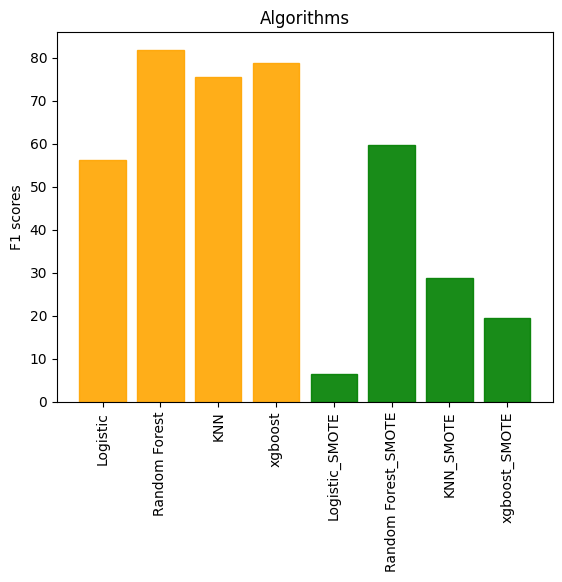

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

#plotting accuracies
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
accuracies = np.arange(len(algos))
performance = [lr_ac,rf_ac,knn_ac,xgb_ac,lr_ac_sm,rf_ac_sm,knn_ac_sm,xgb_ac_sm]
bars = plt.bar(accuracies, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(accuracies, algos,rotation='vertical')
plt.ylabel('Accuracies')
plt.title('Algorithms')
plt.show()

#plotting recall scores
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
recalls = np.arange(len(algos))
performance = [lr_rs,rf_rs,knn_rs,xgb_rs,lr_rs_sm,rf_rs_sm,knn_rs_sm,xgb_rs_sm]
bars = plt.bar(recalls, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(recalls, algos,rotation='vertical')
plt.ylabel('Recalls')
plt.title('Algorithms')
plt.show()

#plotting precisions
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
precisions = np.arange(len(algos))
performance = [lr_ps,rf_ps,knn_ps,xgb_ps,lr_ps_sm,rf_ps_sm,knn_ps_sm,xgb_ps_sm]
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Precisions')
plt.title('Algorithms')
plt.show()

#plotting F1 scores
algos = ('Logistic','Random Forest','KNN','xgboost','Logistic_SMOTE','Random Forest_SMOTE','KNN_SMOTE','xgboost_SMOTE')
fscores = np.arange(len(algos))
performance = [lr_fs,rf_fs,knn_fs,xgb_fs,lr_fs_sm,rf_fs_sm,knn_fs_sm,xgb_fs_sm]
bars = plt.bar(fscores, performance, align='center', alpha=0.9)
for i in range(len(bars)):
    if(i<4):
        bars[i].set_color('orange')
    else: bars[i].set_color('green')
plt.xticks(fscores, algos,rotation='vertical')
plt.ylabel('F1 scores')
plt.title('Algorithms')
plt.show()

In [50]:
!pip install matplotlib scikit-learn imbalanced-learn xgboost